## Imports

In [17]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
import numpy as np
import pandas as pd
import pickle as pkl
from datetime import datetime
from dateutil import parser

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
plt.rcParams['figure.figsize'] = (12.0, 8.0)
plt.rcParams['axes.axisbelow'] = True

from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go
import plotly.io as pio
init_notebook_mode(True)

from hallprobecalib import hpc_ext_path
from hallprobecalib.hpcplots import scatter2d,scatter3d,histo

## Day 1: Gradient Plots

In [7]:
plotdir = hpc_ext_path+'plots/magnet_maps/2019-05-24/'

In [8]:
directory = hpc_ext_path+'datafiles/magnet_maps/'
filename = '2019-05-24 074557.txt'

In [9]:
df = pd.read_csv(directory+filename)

In [10]:
df.describe()

,Magnet Current [V],Magnet Voltage [V],NMR [T],NMR [FFT],Zaber_Pattern_X,Zaber_Pattern_Y,Zaber_Pattern_Z,Zaber_Meas_MicroStep_X,Zaber_Meas_Encoder_X,Zaber_Meas_MicroStep_Y,Zaber_Meas_Encoder_Y,Zaber_Meas_MicroStep_Z,Zaber_Meas_Encoder_Z
count,17576.000000,17576.000000,17576.000000,17576.0,17576.000000,17576.000000,1.757600e+04,17576.000000,17576.000000,17576.000000,17576.000000,1.757600e+04,17576.000000
mean,8.943584,40.638967,1.037618,0.0,552000.000000,452000.000000,1.620000e+06,552000.000000,215625.000000,452000.000000,176562.500000,1.620000e+06,632812.500000
std,0.000015,0.077918,0.566943,0.0,30000.853473,30000.853473,3.000085e+04,30000.853473,11719.083388,30000.853473,11719.083388,3.000085e+04,11719.083388
min,8.943555,40.390533,0.000000,0.0,502000.000000,402000.000000,1.570000e+06,502000.000000,196093.750000,402000.000000,157031.250000,1.570000e+06,613281.250000
25%,8.943573,40.584346,1.346835,0.0,526000.000000,426000.000000,1.594000e+06,526000.000000,205468.750000,426000.000000,166406.250000,1.594000e+06,622656.250000
50%,8.943581,40.633567,1.347349,0.0,552000.000000,452000.000000,1.620000e+06,552000.000000,215625.000000,452000.000000,176562.500000,1.620000e+06,632812.500000
75%,8.943595,40.707187,1.347622,0.0,578000.000000,478000.000000,1.646000e+06,578000.000000,225781.250000,478000.000000,186718.750000,1.646000e+06,642968.750000
max,8.943623,40.748850,1.348617,0.0,602000.000000,502000.000000,1.670000e+06,602000.000000,235156.250000,502000.000000,196093.750000,1.670000e+06,652343.750000


In [11]:
drops = [col for col in list(df.columns) if ("MicroStep" in col) or ("FFT" in col)]

In [12]:
df.drop(drops,axis=1,inplace=True)

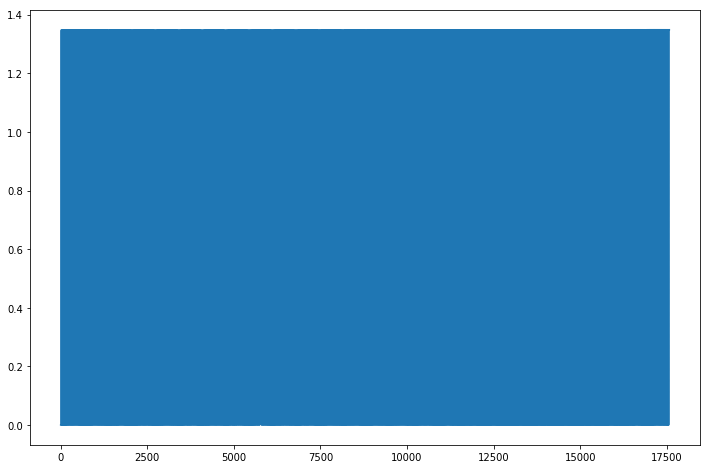

In [13]:
df['NMR [T]'].plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6df8652b00>,
      dtype=object)

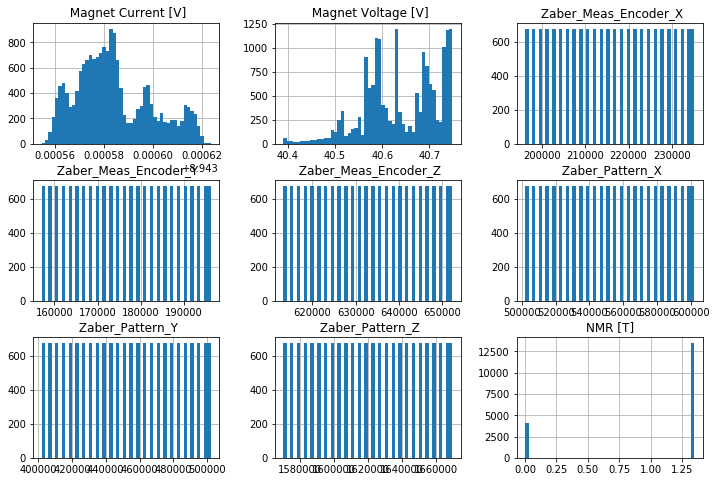

In [14]:
df.hist(bins=50)

In [13]:
notzero = df['NMR [T]'] != 0

In [14]:
df_nz = df[notzero]

In [15]:
len(df_nz)

13536

In [16]:
len(df)

17576

In [17]:
13536/17576

0.7701411015020483

In [18]:
df_nz.describe()

,Magnet Current [V],Magnet Voltage [V],NMR [T],Zaber_Pattern_X,Zaber_Pattern_Y,Zaber_Pattern_Z,Zaber_Meas_Encoder_X,Zaber_Meas_Encoder_Y,Zaber_Meas_Encoder_Z
count,13536.000000,13536.000000,13536.000000,13536.000000,13536.000000,1.353600e+04,13536.000000,13536.000000,13536.000000
mean,8.943584,40.635694,1.347309,550686.761229,453434.101655,1.631173e+06,215112.016105,177122.695959,637176.787825
std,0.000015,0.076961,0.009183,29691.759484,28796.914750,2.386557e+04,11598.343549,11248.794824,9322.488732
min,8.943555,40.390533,0.449454,502000.000000,402000.000000,1.570000e+06,196093.750000,157031.250000,613281.250000
25%,8.943573,40.583275,1.347263,526000.000000,430000.000000,1.610000e+06,205468.750000,167968.750000,628906.250000
50%,8.943582,40.632450,1.347451,550000.000000,454000.000000,1.630000e+06,214843.750000,177343.750000,636718.750000
75%,8.943596,40.700800,1.347747,574000.000000,478000.000000,1.650000e+06,224218.750000,186718.750000,644531.250000
max,8.943623,40.748850,1.348617,602000.000000,502000.000000,1.670000e+06,235156.250000,196093.750000,652343.750000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe020decb00>,
      dtype=object)

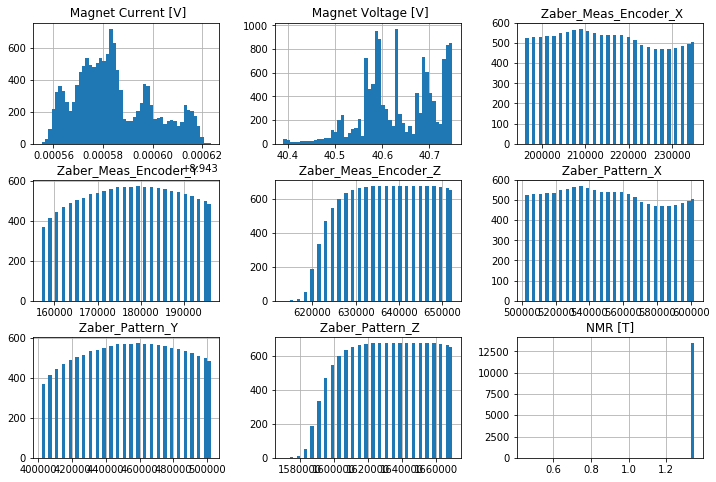

In [19]:
df_nz.hist(bins=50)

In [55]:
df_nz['NMR [T]'].quantile(0.02)

1.3467810754

In [51]:
df['NMR [T]'].quantile(0.24)

1.3466740369999999

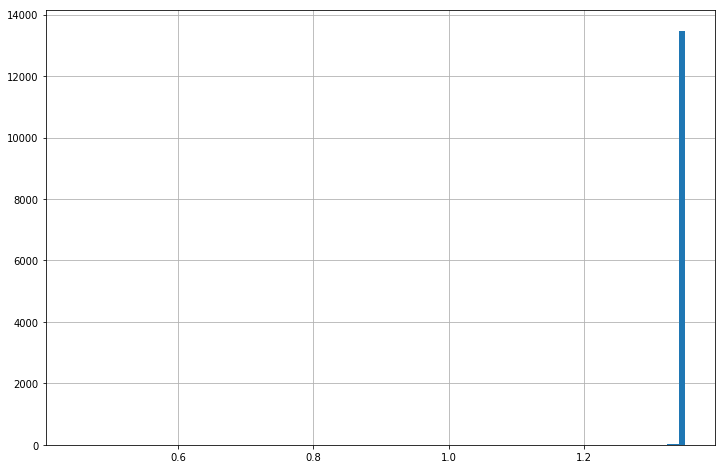

In [40]:
df_nz['NMR [T]'].hist(bins=50)

In [56]:
c2 = df_nz['NMR [T]'] >= df_nz['NMR [T]'].quantile(0.02)

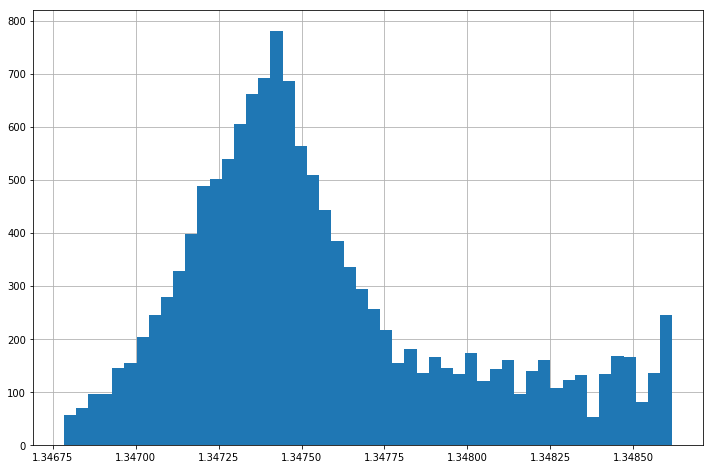

In [57]:
df_nz[c2]['NMR [T]'].hist(bins=50)

In [58]:
df_nz[c2]['NMR [T]'].describe()

count    13265.000000
mean         1.347564
std          0.000421
min          1.346782
25%          1.347277
50%          1.347457
75%          1.347758
max          1.348617
Name: NMR [T], dtype: float64

In [59]:
scatter3d(df_nz[' Zaber_Pattern_X'],df_nz[' Zaber_Pattern_Y'],df_nz[' Zaber_Pattern_Z'],scale_list=[df_nz['NMR [T]']]);

In [15]:
fig = scatter3d(df[' Zaber_Pattern_X'],df[' Zaber_Pattern_Y'],df[' Zaber_Pattern_Z'],scale_list=[df['NMR [T]']]);

In [67]:
pio.write_image(fig, plotdir+'nmr_full_finergrid_2019-05-24.pdf')

In [18]:
df_c = df

### Gradient

In [19]:
x = df_c[' Zaber_Pattern_X'].unique()
y = df_c[' Zaber_Pattern_Y'].unique()
z = df_c[' Zaber_Pattern_Z'].unique()

In [20]:
ff = np.array(df_c['NMR [T]'])
ff = np.reshape(ff,(len(x),len(y),len(z)))

In [21]:
gradx, grady, gradz = np.gradient(ff,x,y,z)

In [22]:
gradmag = (gradx**2+grady**2+gradz**2)**(1/2)

In [23]:
gradx = pd.Series(gradx.flatten())
grady = pd.Series(grady.flatten())
gradz = pd.Series(gradz.flatten())

In [24]:
gradmag = pd.Series(gradmag.flatten())

In [25]:
df_c['GRAD_B_X'],df_c['GRAD_B_Y'],df_c['GRAD_B_Z'],df_c['GRAD_B_MAG'] = (gradx,grady,gradz,gradmag)

In [76]:
notzero = df_c['NMR [T]'] != 0

In [77]:
df_g = df_c[notzero]

In [83]:
#g_cut = df_g["GRAD_B_MAG"] <= df_g["GRAD_B_MAG"].quantile(0.2)
g_cut = df_g["GRAD_B_MAG"] <= df_g["GRAD_B_MAG"].quantile(0.1)

In [87]:
fig = scatter3d([df_g[g_cut][' Zaber_Pattern_X'],df_g[' Zaber_Pattern_X']],[df_g[g_cut][' Zaber_Pattern_Y'],df_g[' Zaber_Pattern_Y']],[df_g[g_cut][' Zaber_Pattern_Z'],df_g[' Zaber_Pattern_Z']],scale_list=[df_g[g_cut]['GRAD_B_MAG'],df_g["GRAD_B_MAG"]],opacity_list=[1.,0.25],colors_list=['Hot','Viridis'],inline=False);

In [88]:
#fig.layout.xaxis.title='Zaber_Pattern_Z (microns)'
fig.layout.scene.xaxis = dict(title=r"Zaber_Pattern_X")
fig.layout.scene.yaxis = dict(title=r"Zaber_Pattern_Y")
fig.layout.scene.zaxis = dict(title=r"Zaber_Pattern_Z")
fig.layout.title = "|grad(B)| vs. x,y,z: Gradient Cut"

In [90]:
plot(fig,filename=plotdir+'gradient_cut_2019-05-24.html')
pio.write_image(fig,plotdir+'gradient_cut_2019-05-24.pdf')

In [91]:
fig = scatter3d([df_g[g_cut][' Zaber_Pattern_X']],[df_g[g_cut][' Zaber_Pattern_Y']],[df_g[g_cut][' Zaber_Pattern_Z']],scale_list=[df_g[g_cut]['GRAD_B_MAG']],opacity_list=[1.],colors_list=['Viridis'],inline=False);

In [92]:
x_cut = (df_g[' Zaber_Pattern_X'] > 528000) & (df_g[' Zaber_Pattern_X'] < 549000)
#x_cut = (df_g[' Zaber_Meas_Encoder_X'] > 200000) & (df_g[' Zaber_Meas_Encoder_X'] < 230000)
y_cut = (df_g[' Zaber_Pattern_Y'] > 440000) & (df_g[' Zaber_Pattern_Y'] < 475000)
z_cut = (df_g[' Zaber_Pattern_Z'] > 1620000) #& (df_g[' Zaber_Meas_Encoder_Z'] < 633000)
#g_cut2 = g_cut & x_cut
g_cut2 = g_cut & x_cut & y_cut & z_cut

In [93]:
scatter3d([df_g[g_cut2][' Zaber_Meas_Encoder_X']],[df_g[g_cut2][' Zaber_Meas_Encoder_Y']],[df_g[g_cut2][' Zaber_Meas_Encoder_Z']],scale_list=[df_g[g_cut2]['GRAD_B_MAG']],opacity_list=[1.],colors_list=['Viridis'],inline=False);

In [94]:
fig = scatter3d([df_g[g_cut2][' Zaber_Pattern_X']],[df_g[g_cut2][' Zaber_Pattern_Y']],[df_g[g_cut2][' Zaber_Pattern_Z']],scale_list=[df_g[g_cut2]['GRAD_B_MAG']],opacity_list=[1.],colors_list=['Viridis'],inline=False);

In [95]:
x_cut = (df_g[' Zaber_Pattern_X'] > 528000) & (df_g[' Zaber_Pattern_X'] < 549000)
#x_cut = (df_g[' Zaber_Meas_Encoder_X'] > 200000) & (df_g[' Zaber_Meas_Encoder_X'] < 230000)
y_cut = (df_g[' Zaber_Pattern_Y'] > 445000) & (df_g[' Zaber_Pattern_Y'] < 471000)
z_cut = (df_g[' Zaber_Pattern_Z'] > 1625000) & (df_g[' Zaber_Pattern_Z'] < 1665000)
#g_cut2 = g_cut & x_cut
g_cut2 = g_cut & x_cut & y_cut & z_cut

In [96]:
fig = scatter3d([df_g[g_cut2][' Zaber_Pattern_X']],[df_g[g_cut2][' Zaber_Pattern_Y']],[df_g[g_cut2][' Zaber_Pattern_Z']],scale_list=[df_g[g_cut2]['GRAD_B_MAG']],opacity_list=[1.],colors_list=['Viridis'],inline=False);

In [97]:
#fig.layout.xaxis.title='Zaber_Pattern_Z (microns)'
fig.layout.scene.xaxis = dict(title=r"Zaber_Pattern_X")
fig.layout.scene.yaxis = dict(title=r"Zaber_Pattern_Y")
fig.layout.scene.zaxis = dict(title=r"Zaber_Pattern_Z")
fig.layout.title = "|grad(B)| vs. x,y,z: Gradient Cut + Position Cut"

In [98]:
plot(fig,filename=plotdir+'gradient_position_cuts_2019-05-24.html')
pio.write_image(fig,plotdir+'gradient_position_cuts_2019-05-24.pdf')

In [99]:
df_g.describe()

,Magnet Current [V],Magnet Voltage [V],NMR [T],Zaber_Pattern_X,Zaber_Pattern_Y,Zaber_Pattern_Z,Zaber_Meas_Encoder_X,Zaber_Meas_Encoder_Y,Zaber_Meas_Encoder_Z,GRAD_B_X,GRAD_B_Y,GRAD_B_Z,GRAD_B_MAG
count,13536.000000,13536.000000,13536.000000,13536.000000,13536.000000,1.353600e+04,13536.000000,13536.000000,13536.000000,1.353600e+04,1.353600e+04,1.353600e+04,1.353600e+04
mean,8.943584,40.635694,1.347309,550686.761229,453434.101655,1.631173e+06,215112.016105,177122.695959,637176.787825,-1.381824e-07,1.466524e-06,8.093889e-06,1.165693e-05
std,0.000015,0.076961,0.009183,29691.759484,28796.914750,2.386557e+04,11598.343549,11248.794824,9322.488732,2.281712e-05,2.466326e-05,3.750929e-05,4.967530e-05
min,8.943555,40.390533,0.449454,502000.000000,402000.000000,1.570000e+06,196093.750000,157031.250000,613281.250000,-3.357587e-04,-1.685616e-04,-1.685729e-04,3.696581e-10
25%,8.943573,40.583275,1.347263,526000.000000,430000.000000,1.610000e+06,205468.750000,167968.750000,628906.250000,-7.347906e-09,-4.392750e-09,-1.950688e-09,1.443009e-08
50%,8.943582,40.632450,1.347451,550000.000000,454000.000000,1.630000e+06,214843.750000,177343.750000,636718.750000,8.805062e-09,1.108188e-09,1.413563e-09,2.138207e-08
75%,8.943596,40.700800,1.347747,574000.000000,478000.000000,1.650000e+06,224218.750000,186718.750000,644531.250000,2.481484e-08,8.207125e-09,7.063031e-09,2.904227e-08
max,8.943623,40.748850,1.348617,602000.000000,502000.000000,1.670000e+06,235156.250000,196093.750000,652343.750000,3.371318e-04,2.247322e-04,1.685736e-04,4.129008e-04


In [100]:
df_g[g_cut].describe()

,Magnet Current [V],Magnet Voltage [V],NMR [T],Zaber_Pattern_X,Zaber_Pattern_Y,Zaber_Pattern_Z,Zaber_Meas_Encoder_X,Zaber_Meas_Encoder_Y,Zaber_Meas_Encoder_Z,GRAD_B_X,GRAD_B_Y,GRAD_B_Z,GRAD_B_MAG
count,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1.354000e+03,1354.000000,1354.000000,1354.000000,1.354000e+03,1.354000e+03,1.354000e+03,1.354000e+03
mean,8.943587,40.604525,1.347420,537090.103397,457607.090103,1.639832e+06,209800.821640,178752.769572,640559.222674,7.742219e-10,2.500799e-10,4.928767e-11,7.126047e-09
std,0.000011,0.034449,0.000087,12208.553802,16517.834478,1.618230e+04,4768.966329,6452.279093,6321.208990,4.780080e-09,4.180481e-09,3.739009e-09,2.037786e-09
min,8.943558,40.396317,1.347115,502000.000000,402000.000000,1.590000e+06,196093.750000,157031.250000,621093.750000,-9.698625e-09,-9.318000e-09,-9.391625e-09,3.696581e-10
25%,8.943583,40.587171,1.347374,530000.000000,450000.000000,1.630000e+06,207031.250000,175781.250000,636718.750000,-2.405531e-09,-2.776844e-09,-2.353719e-09,5.761641e-09
50%,8.943586,40.597992,1.347420,538000.000000,458000.000000,1.642000e+06,210156.250000,178906.250000,641406.250000,1.333750e-09,4.915000e-10,-2.982500e-10,7.643314e-09
75%,8.943596,40.631217,1.347460,546000.000000,470000.000000,1.650000e+06,213281.250000,183593.750000,644531.250000,3.875844e-09,3.444094e-09,2.298813e-09,8.785232e-09
max,8.943620,40.692983,1.347748,562000.000000,502000.000000,1.670000e+06,219531.250000,196093.750000,652343.750000,9.732250e-09,9.376500e-09,9.247875e-09,9.763136e-09


In [101]:
df_g[g_cut2].describe()

,Magnet Current [V],Magnet Voltage [V],NMR [T],Zaber_Pattern_X,Zaber_Pattern_Y,Zaber_Pattern_Z,Zaber_Meas_Encoder_X,Zaber_Meas_Encoder_Y,Zaber_Meas_Encoder_Z,GRAD_B_X,GRAD_B_Y,GRAD_B_Z,GRAD_B_MAG
count,348.000000,348.000000,348.000000,348.000000,348.000000,3.480000e+02,348.000000,348.000000,348.000000,3.480000e+02,3.480000e+02,3.480000e+02,3.480000e+02
mean,8.943590,40.603161,1.347437,537954.022989,458000.000000,1.643897e+06,210138.290230,178906.250000,642147.090517,1.888649e-09,6.660614e-10,-8.348951e-10,4.859928e-09
std,0.000006,0.017786,0.000023,5648.509627,7982.690207,1.145701e+04,2206.449073,3118.238362,4475.393929,2.587748e-09,2.922385e-09,2.579058e-09,1.709562e-09
min,8.943581,40.582467,1.347367,530000.000000,446000.000000,1.626000e+06,207031.250000,174218.750000,635156.250000,-2.917250e-09,-6.421125e-09,-6.368875e-09,9.978719e-10
25%,8.943585,40.587225,1.347422,534000.000000,450000.000000,1.634000e+06,208593.750000,175781.250000,638281.250000,5.323125e-10,-1.741844e-09,-2.833156e-09,3.615054e-09
50%,8.943588,40.598167,1.347439,538000.000000,458000.000000,1.642000e+06,210156.250000,178906.250000,641406.250000,2.291688e-09,6.972500e-10,-5.588750e-10,4.783708e-09
75%,8.943597,40.614354,1.347451,542000.000000,466000.000000,1.654000e+06,211718.750000,182031.250000,646093.750000,3.822219e-09,3.182156e-09,1.144187e-09,6.032132e-09
max,8.943602,40.634333,1.347483,546000.000000,470000.000000,1.662000e+06,213281.250000,183593.750000,649218.750000,6.872375e-09,6.789500e-09,3.763000e-09,9.586359e-09


In [102]:
best_center = df_g[g_cut2][' Zaber_Meas_Encoder_X'].min()+(df_g[g_cut2][' Zaber_Meas_Encoder_X'].max()-df_g[g_cut2][' Zaber_Meas_Encoder_X'].min())/2
best_center

210156.25

In [105]:
#true_center = df[' Zaber_Meas_Encoder_X'].min()+(df[' Zaber_Meas_Encoder_X'].max()-df[' Zaber_Meas_Encoder_X'].min())/2
#true_center

From the last analysis, which did a full scan of the magnet, true_center is 208984.375

In [106]:
true_center = 208984.375

In [107]:
best_center-true_center

1171.875

Great, now the shift from center is only 1.1 mm, instead of 5.8 mm.

In [108]:
df_g[g_cut2].drop('Time',axis=1).max()-df_g[g_cut2].drop('Time',axis=1).min()

 Magnet Current [V]      2.140200e-05
 Magnet Voltage [V]      5.186667e-02
NMR [T]                  1.157530e-04
 Zaber_Pattern_X         1.600000e+04
 Zaber_Pattern_Y         2.400000e+04
 Zaber_Pattern_Z         3.600000e+04
 Zaber_Meas_Encoder_X    6.250000e+03
 Zaber_Meas_Encoder_Y    9.375000e+03
 Zaber_Meas_Encoder_Z    1.406250e+04
GRAD_B_X                 9.789625e-09
GRAD_B_Y                 1.321062e-08
GRAD_B_Z                 1.013188e-08
GRAD_B_MAG               8.588487e-09
dtype: float64

In [109]:
df_g.drop('Time',axis=1).max()-df_g.drop('Time',axis=1).min()

 Magnet Current [V]           0.000068
 Magnet Voltage [V]           0.358317
NMR [T]                       0.899163
 Zaber_Pattern_X         100000.000000
 Zaber_Pattern_Y         100000.000000
 Zaber_Pattern_Z         100000.000000
 Zaber_Meas_Encoder_X     39062.500000
 Zaber_Meas_Encoder_Y     39062.500000
 Zaber_Meas_Encoder_Z     39062.500000
GRAD_B_X                      0.000673
GRAD_B_Y                      0.000393
GRAD_B_Z                      0.000337
GRAD_B_MAG                    0.000413
dtype: float64

In [110]:
#df_g[" Zaber_Pattern_Z"].unique()
#x = df_g[" Zaber_Meas_Encoder_X"].unique()
#x = df_g[" Zaber_Meas_Encoder_Y"].unique()
x = df_g[" Zaber_Meas_Encoder_Z"].unique()
for i,p in enumerate(x[:-1]):
    print (x[i+1] - x[i])

1562.5
1562.5
1562.5
1562.5
1562.5
1562.5
1562.5
1562.5
1562.5
1562.5
1562.5
1562.5
1562.5
1562.5
-23437.5
-3125.0
1562.5
-3125.0
-1562.5
-1562.5
-1562.5
-1562.5
-1562.5
-1562.5
-1562.5


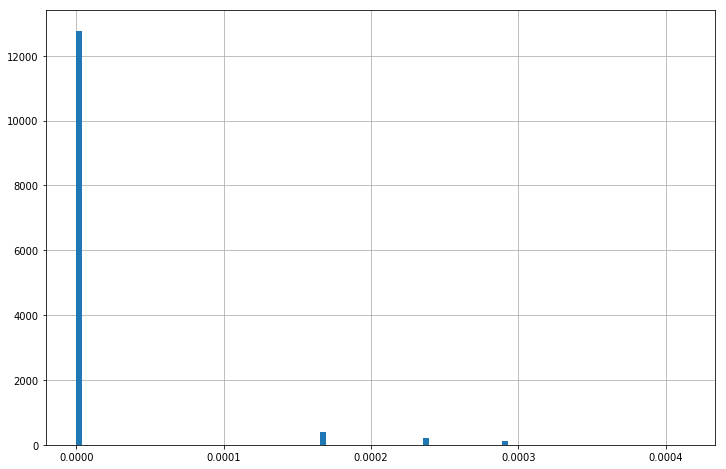

In [111]:
df_g.GRAD_B_MAG.hist(bins=100)

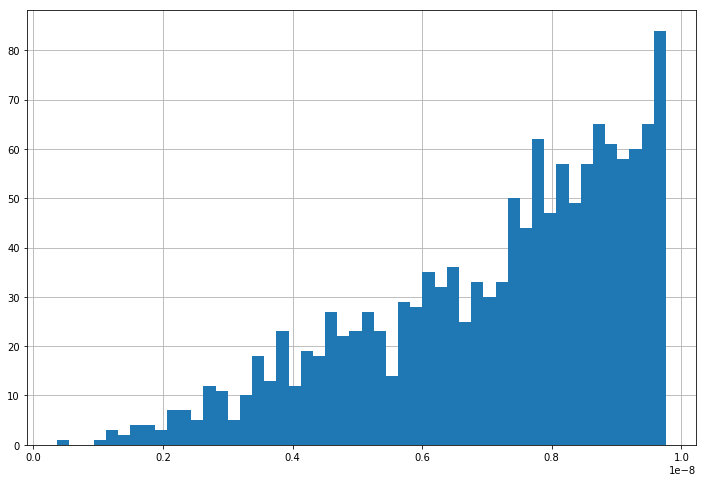

In [115]:
df_g[g_cut].GRAD_B_MAG.hist(bins=50)

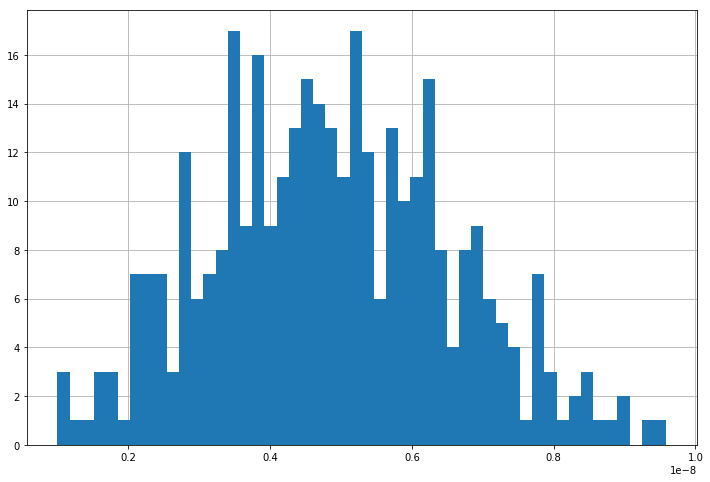

In [118]:
df_g[g_cut2].GRAD_B_MAG.hist(bins=50)

In [119]:
df_c.GRAD_B_MAG.describe()

count    1.757600e+04
mean     1.830754e-05
std      6.309160e-05
min      0.000000e+00
25%      8.996971e-09
50%      1.868761e-08
75%      2.819744e-08
max      5.056852e-04
Name: GRAD_B_MAG, dtype: float64

In [120]:
df_c.GRAD_B_Y.describe()

count    1.757600e+04
mean     2.516702e-06
std      3.476070e-05
min     -3.370038e-04
25%     -2.676375e-09
50%      0.000000e+00
75%      6.149656e-09
max      3.371478e-04
Name: GRAD_B_Y, dtype: float64

In [123]:
d0 = parser.parse(df['Time'].head(1)[0])

d = parser.parse(df['Time'].tail(1)[17575])

tdelta = d-d0

speed = tdelta.total_seconds() / len(df)
speed

16.384729176149296

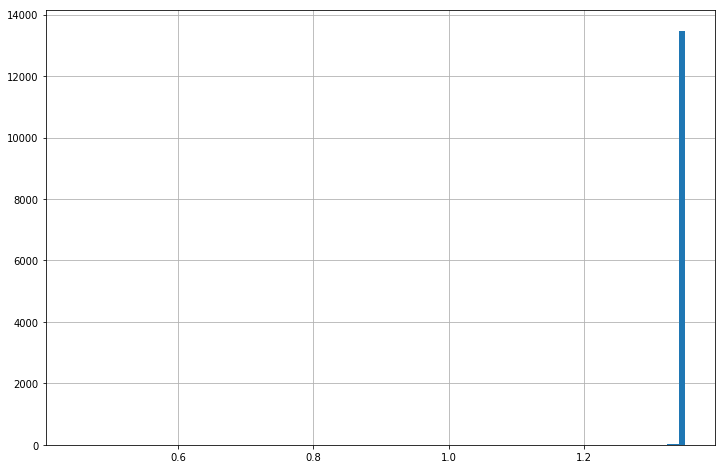

In [124]:
df_g['NMR [T]'].hist(bins=100)

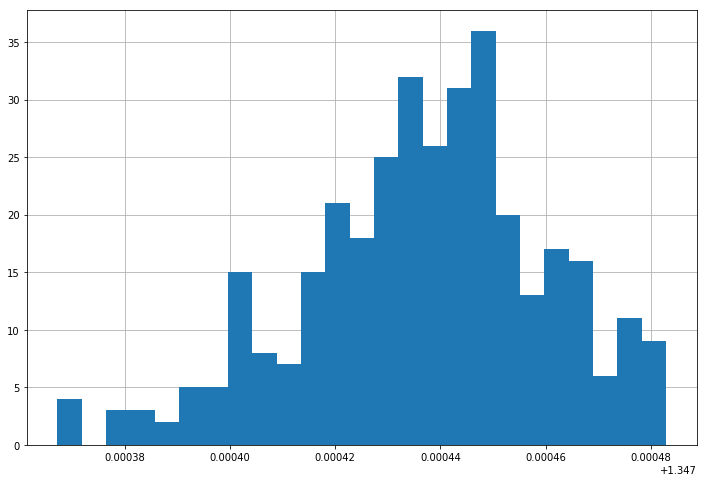

In [125]:
df_g[g_cut2]['NMR [T]'].hist(bins=25)

In [126]:
df_g['NMR [T]'].describe()

count    13536.000000
mean         1.347309
std          0.009183
min          0.449454
25%          1.347263
50%          1.347451
75%          1.347747
max          1.348617
Name: NMR [T], dtype: float64

In [127]:
df_g[g_cut2]['NMR [T]'].describe()

count    348.000000
mean       1.347437
std        0.000023
min        1.347367
25%        1.347422
50%        1.347439
75%        1.347451
max        1.347483
Name: NMR [T], dtype: float64

In [131]:
fig = histo(df_g['NMR [T]'],bins=100, inline=True)
fig = histo(df_g['NMR [T]'],bins=100,yscale='log', inline=True)

In [132]:
fig.layout.title = "NMR [T]: No Cut"

In [133]:
iplot(fig)

In [138]:
fig = histo(df_g[g_cut2]['NMR [T]'],bins=25,yscale='log',inline=True)
fig = histo(df_g[g_cut2]['NMR [T]'],bins=25,inline=True)

In [139]:
fig.layout.title = "NMR [T]: Gradient + Position Cut"

In [140]:
iplot(fig)

In [142]:
#pio.write_image(fig,plotdir+'nmr_hist_gradient_position_cuts_2019-05-24.png')
pio.write_image(fig,plotdir+'nmr_hist_gradient_position_cuts_2019-05-24.pdf')

In [136]:
x_cut_0 = (df_g[' Zaber_Pattern_X'] > 530000) & (df_g[' Zaber_Pattern_X'] < 570000)
#x_cut = (df_g[' Zaber_Meas_Encoder_X'] > 200000) & (df_g[' Zaber_Meas_Encoder_X'] < 230000)
y_cut_0 = (df_g[' Zaber_Pattern_Y'] > 437000) & (df_g[' Zaber_Pattern_Y'] < 487000)
z_cut_0 = (df_g[' Zaber_Pattern_Z'] > 1580000) & (df_g[' Zaber_Meas_Encoder_Z'] < 1620000)
#g_cut2 = g_cut & x_cut
g_cut_0 = g_cut & x_cut_0 & y_cut_0 & z_cut_0

In [137]:
fig = histo(df_g[g_cut_0]['NMR [T]'],bins=25,inline=True)

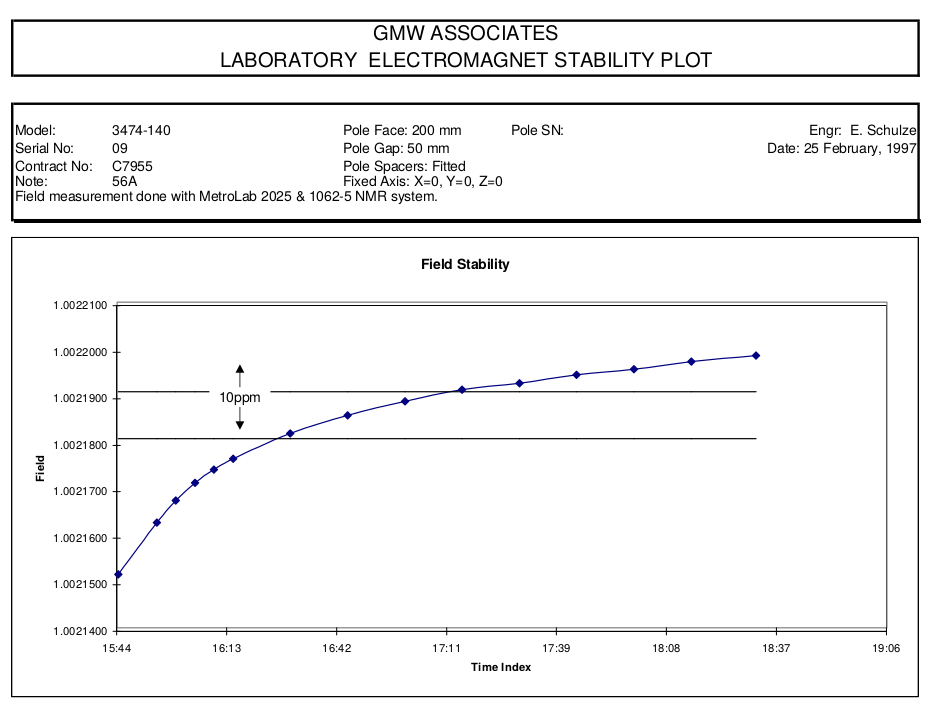

Magnet field strength has drifted by about -4 Gauss between the 2019-04-27 map and the 2019-05-24 map. Should check with Thomas if the magnet and environment were left exactly the same in that time. Also should check the partial map from the week before.

GMMW's stability plot (pg 68, GMW-MAN-3474-RevH-July2009.pdf) seems to indicate a drift of ~.5 Gauss over a period of 3 hours.

### Dump gradient data

In [26]:
pkl.dump(df_c,open(directory+filename.rstrip('.txt')+'.pkl','wb'))

## Day 2: "Slices and Uniformity" -Thomas

In [143]:
# 3d surface plots
df_c[' Zaber_Pattern_X'].unique()

array([502000., 506000., 510000., 514000., 518000., 522000., 526000.,
       530000., 534000., 538000., 542000., 546000., 550000., 554000.,
       558000., 562000., 566000., 570000., 574000., 578000., 582000.,
       586000., 590000., 594000., 598000., 602000.])

In [144]:
x1 = (df_c[' Zaber_Pattern_X'] == 542000.)

In [145]:
slicex = df_c[x1]

In [146]:
slicex

,Time,Magnet Current [V],Magnet Voltage [V],NMR [T],Zaber_Pattern_X,Zaber_Pattern_Y,Zaber_Pattern_Z,Zaber_Meas_Encoder_X,Zaber_Meas_Encoder_Y,Zaber_Meas_Encoder_Z,GRAD_B_X,GRAD_B_Y,GRAD_B_Z,GRAD_B_MAG
6760,5/25/2019 2:07:38 PM,8.943598,40.604283,0.000000,542000.0,402000.0,1570000.0,211718.75,157031.25,613281.25,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
6761,5/25/2019 2:08:03 PM,8.943599,40.604500,0.000000,542000.0,402000.0,1574000.0,211718.75,157031.25,614843.75,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
6762,5/25/2019 2:08:28 PM,8.943598,40.604683,0.000000,542000.0,402000.0,1578000.0,211718.75,157031.25,616406.25,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
6763,5/25/2019 2:08:54 PM,8.943598,40.604900,0.000000,542000.0,402000.0,1582000.0,211718.75,157031.25,617968.75,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
6764,5/25/2019 2:09:19 PM,8.943598,40.605117,0.000000,542000.0,402000.0,1586000.0,211718.75,157031.25,619531.25,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
6765,5/25/2019 2:09:32 PM,8.943598,40.605183,0.000000,542000.0,402000.0,1590000.0,211718.75,157031.25,621093.75,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
6766,5/25/2019 2:09:44 PM,8.943600,40.605267,0.000000,542000.0,402000.0,1594000.0,211718.75,157031.25,622656.25,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
6767,5/25/2019 2:10:09 PM,8.943596,40.605417,0.000000,542000.0,402000.0,1598000.0,211718.75,157031.25,624218.75,0.000000e+00,3.366435e-04,0.000000e+00,3.366435e-04
6768,5/25/2019 2:10:23 PM,8.943598,40.605517,0.000000,542000.0,402000.0,1602000.0,211718.75,157031.25,625781.25,-1.683143e-04,3.366624e-04,0.000000e+00,3.763925e-04
6769,5/25/2019 2:10:35 PM,8.943597,40.605550,0.000000,542000.0,402000.0,1606000.0,211718.75,157031.25,627343.75,1.481200e-08,3.366817e-04,1.683377e-04,3.764201e-04


In [147]:
histo(slicex['NMR [T]'][slicex['NMR [T]']!=0],bins=25,inline=True);

In [148]:
#x = slicex[' Zaber_Pattern_X'].unique()
x = slicex[' Zaber_Pattern_Y'].unique()
y = slicex[' Zaber_Pattern_Z'].unique()
z = np.array(slicex['NMR [T]'])
z = np.array([i if i>=slicex['NMR [T]'][slicex['NMR [T]']!=0].quantile(0.05) else slicex['NMR [T]'][slicex['NMR [T]']!=0].quantile(0.05) for i in z])
#XX = XX.flatten()
#YY = YY.flatten()
#ZZ = XX.flatten()
xx,yy = np.meshgrid(x,y,indexing='ij')
zz = np.reshape(z,(len(x),len(y)))

In [149]:
data = [go.Surface(x=xx,y=yy,z=zz, opacity=0.8, colorscale="Viridis")]#,cmin=1.346,cmax=1.348)]

layout = go.Layout(
    title='Calibrated B_mag vs. Angle',
    scene = dict(
    xaxis= dict(
        title='Zaber_Pattern_Y'
    ),
    yaxis=dict(
        title='Zaber_Pattern_Z'
    ),
    zaxis=dict(
        title='NMR (T)'
    )
    )
)

fig = go.Figure(data=data, layout=layout)

In [150]:
plot(fig)

'file:///home/ckampa/Coding/hallprobecalib/scripts/temp-plot.html'

In [151]:
slicesx = []
for x in df_c[' Zaber_Pattern_X'].unique():
    #_ = df_c[df_c[' Zaber_Pattern_X'] == x]
    slicesx.append(df_c[df_c[' Zaber_Pattern_X'] == x])
    #slicesx.append(_)

In [152]:
x_slice = slicex[' Zaber_Pattern_X'].head(1).values[0]
x_slice

542000.0

In [156]:
for slicex in slicesx:
    x_slice = slicex[' Zaber_Pattern_X'].head(1).values[0]
    x = slicex[' Zaber_Pattern_Y'].unique()
    y = slicex[' Zaber_Pattern_Z'].unique()
    z = np.array(slicex['NMR [T]'])
    z = np.array([i if i>=slicex['NMR [T]'][slicex['NMR [T]']!=0].quantile(0.05) else slicex['NMR [T]'][slicex['NMR [T]']!=0].quantile(0.05) for i in z])
    xx,yy = np.meshgrid(x,y,indexing='ij')
    zz = np.reshape(z,(len(x),len(y)))
    
    data = [go.Surface(x=xx,y=yy,z=zz, opacity=0.8, colorscale="Viridis")]#,cmin=1.346,cmax=1.348)]

    layout = go.Layout(
        title=f'Zaber_Pattern_X = {x_slice} slice',
        scene = dict(
        xaxis= dict(
            title='Zaber_Pattern_Y'
        ),
        yaxis=dict(
            title='Zaber_Pattern_Z'
        ),
        zaxis=dict(
            title='NMR (T)'
        )
        )
    )

    fig = go.Figure(data=data, layout=layout)
    fname = plotdir+f"slices/xslice_pattern_{x_slice}"#+'.pdf'
    plot(fig,filename=fname+'.html')
    pio.write_image(fig, fname+'.pdf')